In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
# Load dataset
df = pd.read_csv('/content/Emails.csv.csv', encoding='latin-1')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [91]:
df.columns

Index(['text', 'spam'], dtype='object')

In [92]:
# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# Text preprocessing function
def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#','', text)  # Remove @mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [PorterStemmer().stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [94]:
# Apply text cleaning
df['cleaned_message'] = df['text'].apply(clean_text)

In [95]:
# Display the cleaned dataset sample
df[['text', 'cleaned_message']].head()

,text,cleaned_message
0,Subject: naturally irresistible your corporate...,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",subject money get softwar cd softwar compat gr...


In [96]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.9)
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['spam']

In [97]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


In [98]:
#Split data into Training and Testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [100]:
#Make predictions and check performance
y_pred = model.predict(X_test)

In [101]:
#Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")


✅ Accuracy: 93.89 %


In [102]:
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🧾 Confusion Matrix:
[[856   0]
 [ 70 220]]


In [103]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       856
           1       1.00      0.76      0.86       290

    accuracy                           0.94      1146
   macro avg       0.96      0.88      0.91      1146
weighted avg       0.94      0.94      0.94      1146



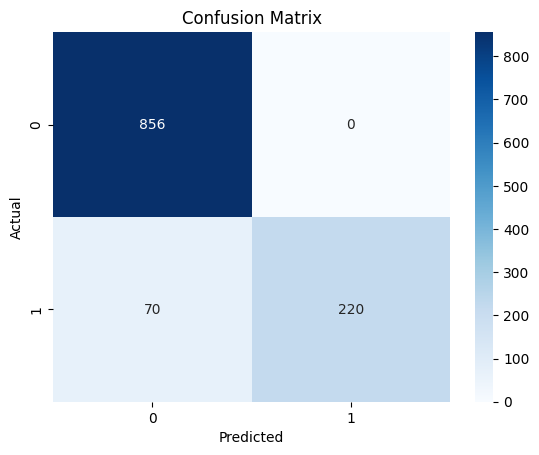

In [104]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [105]:
import joblib

# Save model
joblib.dump(model, "model.pkl")

# Save TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [106]:
import streamlit as st
import joblib

# Load model and vectorizer
model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# UI Title
st.title("📧 Email Spam Classifier")

# Input
email = st.text_area("Enter the email content here:")

if st.button("Predict"):
    clean_email = email.lower().strip()
    vectorized = vectorizer.transform([clean_email])
    prediction = model.predict(vectorized)[0]

    if prediction == 1:
        st.error("❌ Spam Email")
    else:
        st.success("✅ Not Spam Email")


2025-08-06 01:36:10.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 01:36:10.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar